In [168]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\USER PC\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip


In [169]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\USER PC\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip


In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
import pandas as pd

# قراءة الملف
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [189]:
# توحيد أسماء الأعمدة
df.columns = df.columns.str.strip().str.lower()


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [213]:
# تنظيف النصوص
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip().str.lower()

# معالجة القيم المفقودة
df.fillna("unknown", inplace=True)

# Remove duplicates
df = df.drop_duplicates()
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one year,yes,mailed check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber optic,no,...,yes,no,yes,yes,one year,yes,credit card (automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no phone service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber optic,no,...,no,no,no,no,month-to-month,yes,mailed check,74.40,306.6,yes


In [215]:
# تحويل العمود الهدف churn إلى 0/1
y = df['churn'].map({'yes':1, 'no':0})
X = df.drop('churn', axis=1)
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# تحديد الأعمدة النصية والرقمية
categorical_cols = X.select_dtypes(include="object").columns
numeric_cols = X.select_dtypes(exclude="object").columns

# محول الأعمدة
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [218]:
from sklearn.linear_model import LogisticRegression

# البايبلاين الكامل
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight="balanced", max_iter=1000))
])

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب النموذج
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [219]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = pipeline.predict(X_test)

print("Train Accuracy:", pipeline.score(X_train, y_train))
print("Test Accuracy:", pipeline.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Train Accuracy: 0.9059282925097621
Test Accuracy: 0.7863733144073811
Confusion Matrix:
 [[823 213]
 [ 88 285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.85      1036
           1       0.57      0.76      0.65       373

    accuracy                           0.79      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.82      0.79      0.79      1409



In [220]:
import numpy as np

# الحصول على أسماء الميزات بعد الـ OneHotEncoder
feature_names = (
    pipeline.named_steps['preprocessor']
    .transformers_[0][2].tolist() +   # الأعمدة الرقمية
    pipeline.named_steps['preprocessor']
    .transformers_[1][1].get_feature_names_out(categorical_cols).tolist()  # الأعمدة النصية بعد الترميز
)

# معاملات النموذج
coefficients = pipeline.named_steps['classifier'].coef_[0]

# تجميعها في DataFrame
importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# أهم الميزات الإيجابية (تزيد احتمال churn)
print("Top Positive Features:\n", importance.head(10))

# أهم الميزات السلبية (تقلل احتمال churn)
print("Top Negative Features:\n", importance.tail(10))

Top Positive Features:
                     Feature  Coefficient
5837    totalcharges_1099.6     1.513912
3618  customerid_6323-aybrx     1.513912
5759   totalcharges_1052.35     1.507622
330   customerid_0607-daahe     1.507622
7835    totalcharges_3046.4     1.503016
1922  customerid_3400-esfuw     1.503016
1985  customerid_3512-izikn     1.491430
8950   totalcharges_4759.75     1.491430
6968      totalcharges_20.2     1.398692
8755      totalcharges_4481     1.387493
Top Negative Features:
                   Feature  Coefficient
6176  totalcharges_134.05    -0.552932
7332    totalcharges_24.7    -0.585934
6874   totalcharges_19.55    -0.605564
7329    totalcharges_24.4    -0.619414
5953  totalcharges_118.25    -0.642344
9108   totalcharges_50.15    -0.703941
6419  totalcharges_151.75    -0.721416
5671    contract_two year    -0.757682
1                  tenure    -0.816658
8700      totalcharges_44    -0.840449


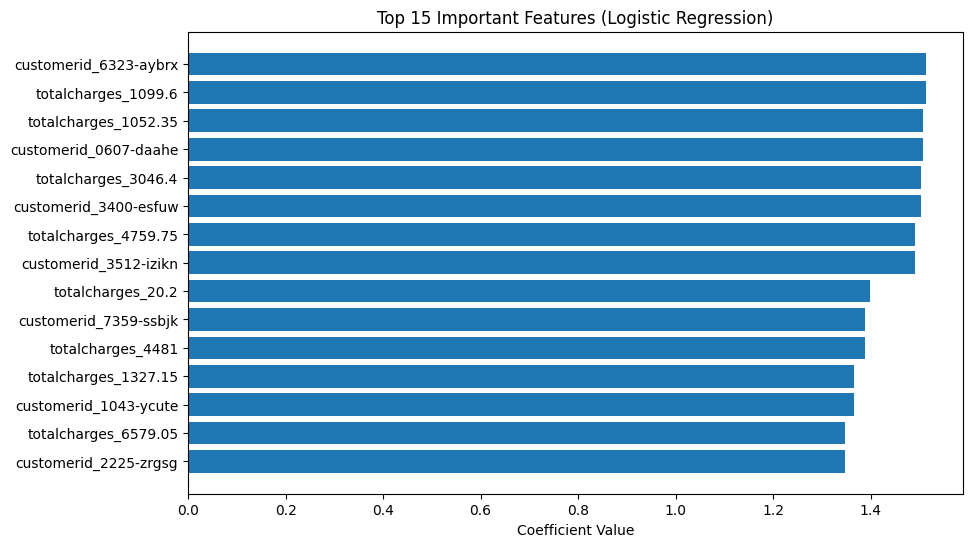

In [221]:
import matplotlib.pyplot as plt
import numpy as np

# استخراج أسماء الميزات بعد الترميز
feature_names = (
    pipeline.named_steps['preprocessor']
    .transformers_[0][2].tolist() +
    pipeline.named_steps['preprocessor']
    .transformers_[1][1].get_feature_names_out(categorical_cols).tolist()
)

# معاملات النموذج
coefficients = pipeline.named_steps['classifier'].coef_[0]

# حساب الأهمية المطلقة
importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
}).sort_values(by='AbsCoefficient', ascending=False)

# اختيار أهم 15 ميزة
top_features = importance.head(15)

# رسم بياني أفقي
plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Top 15 Important Features (Logistic Regression)")
plt.gca().invert_yaxis()  # حتى تظهر الميزة الأعلى في الأعلى
plt.show()

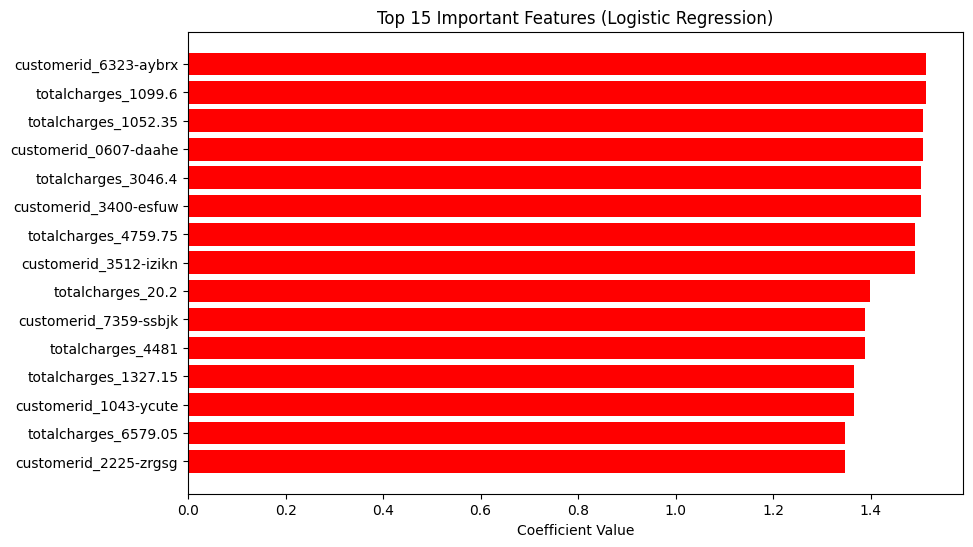

In [222]:
import matplotlib.pyplot as plt
import numpy as np

# استخراج أسماء الميزات
feature_names = (
    pipeline.named_steps['preprocessor']
    .transformers_[0][2].tolist() +
    pipeline.named_steps['preprocessor']
    .transformers_[1][1].get_feature_names_out(categorical_cols).tolist()
)

coefficients = pipeline.named_steps['classifier'].coef_[0]

importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
}).sort_values(by='AbsCoefficient', ascending=False)

# اختيار أهم 15 ميزة
top_features = importance.head(15)

# ألوان: أحمر للميزات التي تزيد churn، أزرق للميزات التي تقلل churn
colors = ['red' if c > 0 else 'blue' for c in top_features['Coefficient']]

plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.xlabel("Coefficient Value")
plt.title("Top 15 Important Features (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()

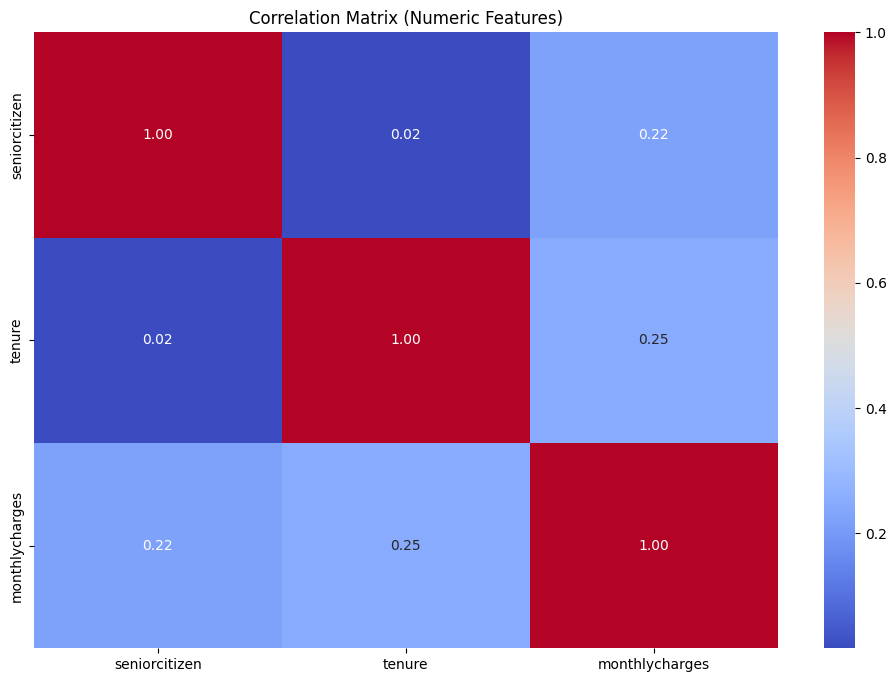

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

# حساب مصفوفة الارتباط للأعمدة الرقمية فقط
corr_matrix = df.select_dtypes(exclude="object").corr()

# رسم Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()